In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data_Train = pd.read_csv('C:\\Users\\Nimisha Jain\\Downloads\\Bike_predict_train.csv')
Data_Test = pd.read_csv('C:\\Users\\Nimisha Jain\\Downloads\\Bike_predict_test.csv')

In [3]:
Data_Train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
Data_Train = pd.concat([Data_Train,Data_Test],ignore_index=True)
Data_Train.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [5]:
Data_Train = Data_Train.drop(columns=['casual','registered'])

In [6]:
print(Data_Train.dtypes)

atemp         float64
count         float64
datetime       object
holiday         int64
humidity        int64
season          int64
temp          float64
weather         int64
windspeed     float64
workingday      int64
dtype: object


In [7]:
Data_Train.isnull().sum()

atemp            0
count         6493
datetime         0
holiday          0
humidity         0
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

In [8]:
Data_Train['count'] = Data_Train['count'].fillna(Data_Train['count'].median())

1.8620042566533532
0.3390664370297221


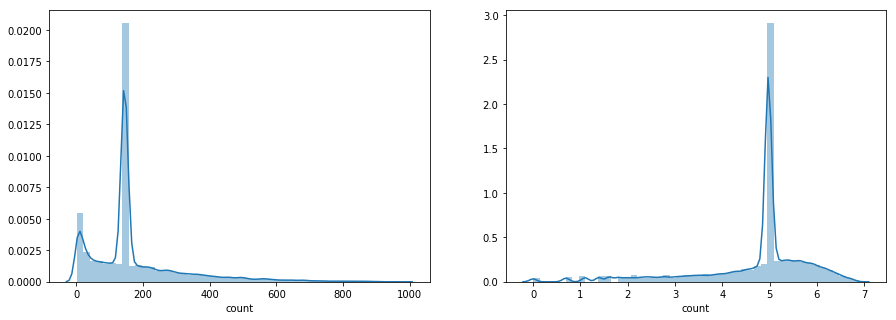

In [9]:
figure, (ax1,ax2) = plt.subplots(1,2)
figure.set_size_inches(15,5)
sns.distplot(Data_Train['count'], ax = ax1)
sns.distplot(np.log(Data_Train['count']), ax = ax2)
print(Data_Train['count'].skew())
print(np.sqrt(Data_Train['count']).skew())

In [10]:
Data_Train['count'] = np.log(Data_Train['count'])

In [11]:
Data_Train['datetime'] = pd.to_datetime(Data_Train['datetime'])
Data_Train['DayofWeek'] = Data_Train['datetime'].dt.dayofweek
Data_Train['Hour'] = Data_Train['datetime'].dt.hour
Data_Train['Year'] = Data_Train['datetime'].dt.year
Data_Train['Month'] = Data_Train['datetime'].dt.month
Data_Train = Data_Train.drop(columns=['datetime'])

In [12]:
Data_Train.sample(10)

,atemp,count,holiday,humidity,season,temp,weather,windspeed,workingday,DayofWeek,Hour,Year,Month
9038,30.305,5.459586,0,65,3,26.24,1,6.0032,0,5,23,2012,8
8885,34.090,6.361302,0,40,3,31.16,1,12.9980,0,6,14,2012,8
8327,40.150,4.867534,0,53,3,34.44,1,8.9981,0,6,8,2012,7
4442,26.515,0.693147,0,49,4,22.96,1,12.9980,1,0,3,2011,10
7583,27.275,6.013715,0,88,2,23.78,2,6.0032,1,1,8,2012,5
7817,24.240,2.397895,0,68,2,20.50,1,0.0000,1,2,2,2012,6
1307,21.210,3.871201,0,47,1,17.22,1,32.9975,0,5,8,2011,3
3895,28.030,6.052089,0,81,3,24.60,1,7.0015,1,1,8,2011,9
12380,30.305,4.976734,0,83,3,27.06,1,11.0014,1,1,6,2011,6
4345,25.760,1.386294,0,94,4,22.14,2,0.0000,1,3,2,2011,10


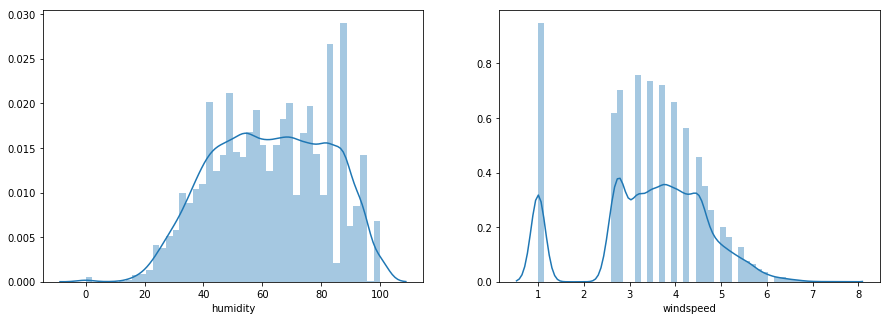

In [13]:
figure, (ax1,ax2) = plt.subplots(1,2)
figure.set_size_inches(15,5)
sns.distplot(Data_Train['humidity'],ax=ax1)
sns.distplot(np.sqrt(Data_Train['windspeed']+1),ax=ax2)

In [14]:
Data_Train['windspeed'] = np.sqrt(Data_Train['windspeed']+1)

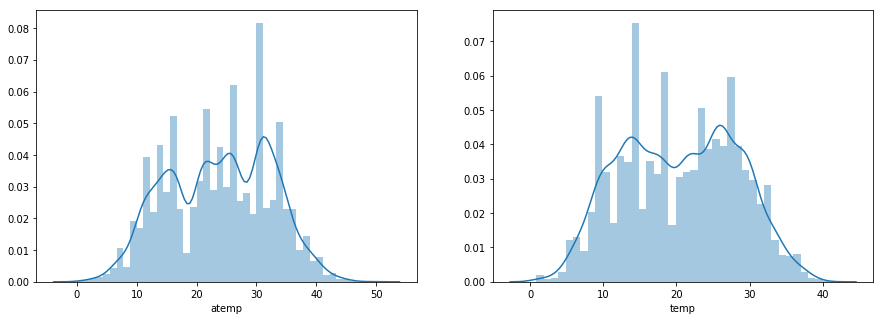

In [15]:
figure, (ax1,ax2) = plt.subplots(1,2)
figure.set_size_inches(15,5)
sns.distplot(Data_Train['atemp'],ax=ax1)
sns.distplot(Data_Train['temp'],ax=ax2)

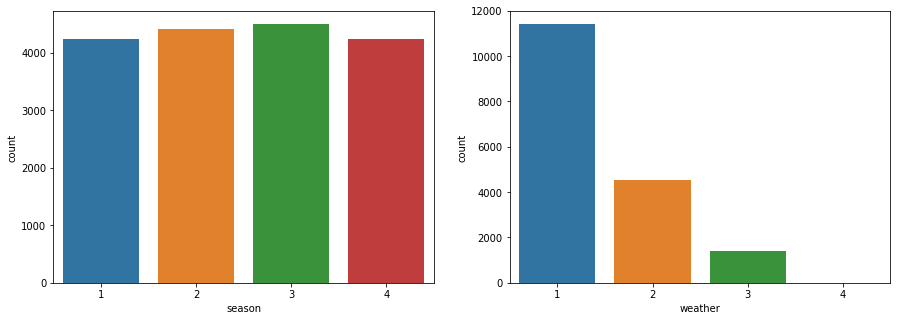

In [16]:
figure, (ax1,ax2) = plt.subplots(1,2)
figure.set_size_inches(15,5)
sns.countplot(Data_Train['season'],ax=ax1)
sns.countplot(Data_Train['weather'],ax=ax2)

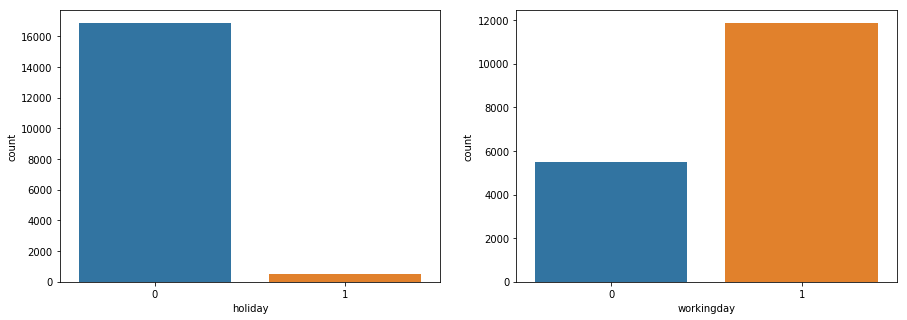

In [17]:
figure, (ax1,ax2) = plt.subplots(1,2)
figure.set_size_inches(15,5)
sns.countplot(Data_Train['holiday'],ax=ax1)
sns.countplot(Data_Train['workingday'],ax=ax2)

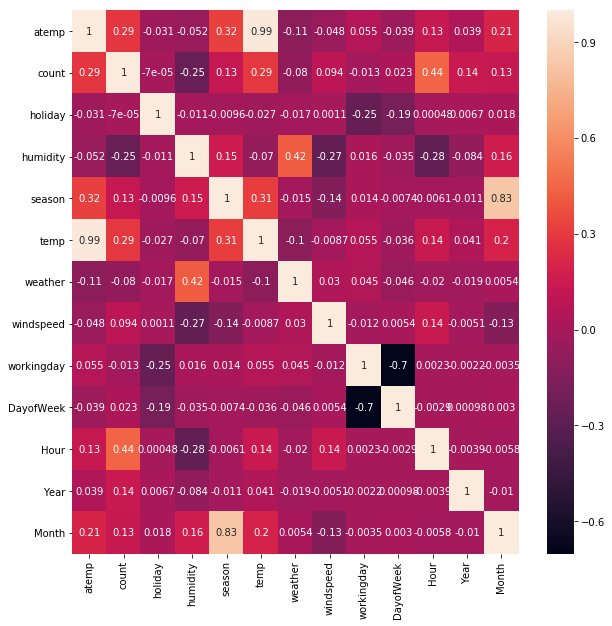

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(Data_Train.corr(),annot=True)

In [19]:
Data_Train = Data_Train.drop(columns='humidity')
Data_Train['season'] = Data_Train['season'].astype('category')
Data_Train['holiday'] = Data_Train['holiday'].astype('category')
Data_Train['weather'] = Data_Train['weather'].astype('category')
Data_Train['workingday'] = Data_Train['workingday'].astype('category')

In [20]:
Data_Train = pd.get_dummies(Data_Train, columns = ['holiday','weather','workingday'])

In [21]:
Data_Train = pd.get_dummies(Data_Train, columns = ['season'])

In [22]:
Data_Train = Data_Train.drop(columns=['weather_4'])

In [23]:
X = Data_Train.drop(columns='count')
y = Data_Train['count']

In [24]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, KFold

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [26]:
scaler = StandardScaler()
poly = PolynomialFeatures()
lr = LinearRegression(normalize=True)
la = Lasso(random_state = 42)
ri = Ridge(random_state = 42)
svr = SVR()
knn = KNeighborsRegressor(n_neighbors=5)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

In [27]:
pipe = []
pipe.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipe.append(('ScaledLAS', Pipeline([('Scaler', StandardScaler()),('LAS', Lasso(random_state = 42))])))
pipe.append(('ScaledRID', Pipeline([('Scaler', StandardScaler()),('RID', Ridge(random_state = 42))])))
pipe.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors = 5))])))
pipe.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state = 42))])))
pipe.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipe.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state = 42))])))
pipe.append(('ScaledGBR', Pipeline([('Scaler', StandardScaler()),('GBR', GradientBoostingRegressor(random_state = 42))])))
for name, model in pipe:
    kfold = KFold(random_state=42)
    cv_result = -cross_val_score(model, X_train,y_train,cv=kfold, scoring='neg_mean_squared_log_error')
    score = "{}: {} {}" .format(name, cv_result.mean(), cv_result.std())
    print(score)

ScaledLR: 0.06324543593117284 0.002048023124235329
ScaledLAS: 0.08447585867390282 0.0026581197581627553
ScaledRID: 0.06324558108363709 0.0020508840835632243
ScaledKNN: 0.04769477440740367 0.0027165361955842236
ScaledDT: 0.058907537237228434 0.0014594476979800125
ScaledSVR: 0.06005789703544224 0.0023049464224217603
ScaledRF: 0.033673711111552825 0.002287226994363492
ScaledGBR: 0.03856982669238268 0.0015149615297625678


In [28]:
test = Data_Test
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [29]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [30]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['DayofWeek'] = test['datetime'].dt.dayofweek
test['Hour'] = test['datetime'].dt.hour
test['Year'] = test['datetime'].dt.year
test['Month'] = test['datetime'].dt.month
test = test.drop(columns=['datetime'])
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,DayofWeek,Hour,Year,Month
0,1,0,1,1,10.66,11.365,56,26.0027,3,0,2011,1
1,1,0,1,1,10.66,13.635,56,0.0000,3,1,2011,1
2,1,0,1,1,10.66,13.635,56,0.0000,3,2,2011,1
3,1,0,1,1,10.66,12.880,56,11.0014,3,3,2011,1
4,1,0,1,1,10.66,12.880,56,11.0014,3,4,2011,1


In [31]:
test['windspeed'] = np.sqrt(test['windspeed']+1)

test['season'] = test['season'].astype('category')
test['holiday'] = test['holiday'].astype('category')
test['weather'] = test['weather'].astype('category')
test['workingday'] = test['workingday'].astype('category')

test = pd.get_dummies(test, columns = ['season','holiday','weather','workingday'])

test = test.drop(columns=['weather_4','humidity'])

In [32]:
test.shape

(6493, 18)

In [57]:
pipeline = Pipeline([('poly', PolynomialFeatures()),('Scaler', StandardScaler()),('GBR', GradientBoostingRegressor(random_state = 42))])
pipeline.fit(X_train,y_train)
test_pred = pipeline.predict(test)

In [58]:
test_pred

array([4.03550229, 3.66319159, 3.37727145, ..., 4.87344216, 4.74339547,
       4.49575299])

In [59]:
pred = pd.DataFrame(test_pred)

sub = pd.read_csv('C:\\Users\\Nimisha Jain\\Downloads\\sampleSubmission.csv')



In [62]:
sub.head(2615)

,datetime,count
0,2011-01-20 00:00:00,4.035502
1,2011-01-20 01:00:00,3.663192
2,2011-01-20 02:00:00,3.377271
3,2011-01-20 03:00:00,3.179755
4,2011-01-20 04:00:00,3.001280
5,2011-01-20 05:00:00,3.366653
6,2011-01-20 06:00:00,4.418103
7,2011-01-20 07:00:00,4.698920
8,2011-01-20 08:00:00,4.931059
9,2011-01-20 09:00:00,4.444560


In [61]:
sub['count'] = pred
sub.to_csv('C:\\Users\\Nimisha Jain\\Downloads\\Submission_Bike_predict.csv', index=False)